First we establish a function f(x) which we will name fun to be called in our other functions.

In [21]:
def fun(x):
    from sympy import symbols
    x1,x2,x3=symbols('x_1,x_2,x_3')
    y=(x[0]+x[1])**2+(x[1]+x[2])**2;
    return y

Next, we will establish a function func_a which will define the search function along its path.

In [22]:
def func_a(fun,dk,xk,ai):
    from numpy import asarray
    xi = xk + ai*asarray(dk)
    fi= fun(xi)
    return fi

Now, we will establish a function to search for the upper and lower bounds of our search. If this domain contains the function minimum then the while loop will break.

In [23]:
def bound_search(fun,xk,dk,LB,UB,delta):
    from numpy import arange
    from numpy import asarray
    as1= arange(LB,UB,delta)
    q=1
    aq=as1[q]
    xq=xk+asarray(dk)*aq
    yq1=func_a(fun,dk,xk,aq)
    while 1:
        q=q+1;
        aq=as1[q]
        yq2 = func_a(fun,dk,xk,aq)
        if yq1<yq2:
            new_LB=as1[q-2]
            new_UB=as1[q]
            break
        yq1=yq2
    return (new_LB,new_UB)

Now, we will establish a function to impliment the line search method. The bounds are searched iteratively until they are within a tolerance epsilon value

In [115]:
def line_search_equal_interval(fun,xk,dk):
    from numpy import arange
    from numpy import append
    from matplotlib.pyplot import subplots
    from matplotlib.pyplot import plot
    from matplotlib.pyplot import xlabel
    from matplotlib.pyplot import ylabel
    fig,ax=subplots()
    LB=.1
    UB=.5
    delta=.01
    r=.2
    epsilon_tolerance=.00001
    aopt_found=0
    iter=1
    as1= arange(LB,UB,delta/10)
    sn = len(as1)
    sn = arange(0,sn,1)
    ys = []
    for i in sn:
        yi=func_a(fun,dk,xk,as1[i])
        ys=append(ys,yi)
    CS = ax.plot(as1,ys)
    while not (aopt_found==1):
        (new_LB,new_UB)=bound_search(fun,xk,dk,LB,UB,delta)
        if abs(new_UB-new_LB) < epsilon_tolerance:
            aopt_found =1;
        delta=r*delta
        LB=new_LB
        UB=new_UB
        iter=iter+1
        a_opt=(UB+LB)/2
        print(a_opt)
        ax.plot(a_opt,min(ys),'ro')
    fig.set_size_inches(18.5, 10.5)

    iter=iter
    
    return a_opt,iter


Finally, we excecute the function we have created.

0.16999999999999998
0.16599999999999998
0.16680000000000006
0.16664000000000004
0.16667199999999996
0.1666656


(0.1666656, 7)

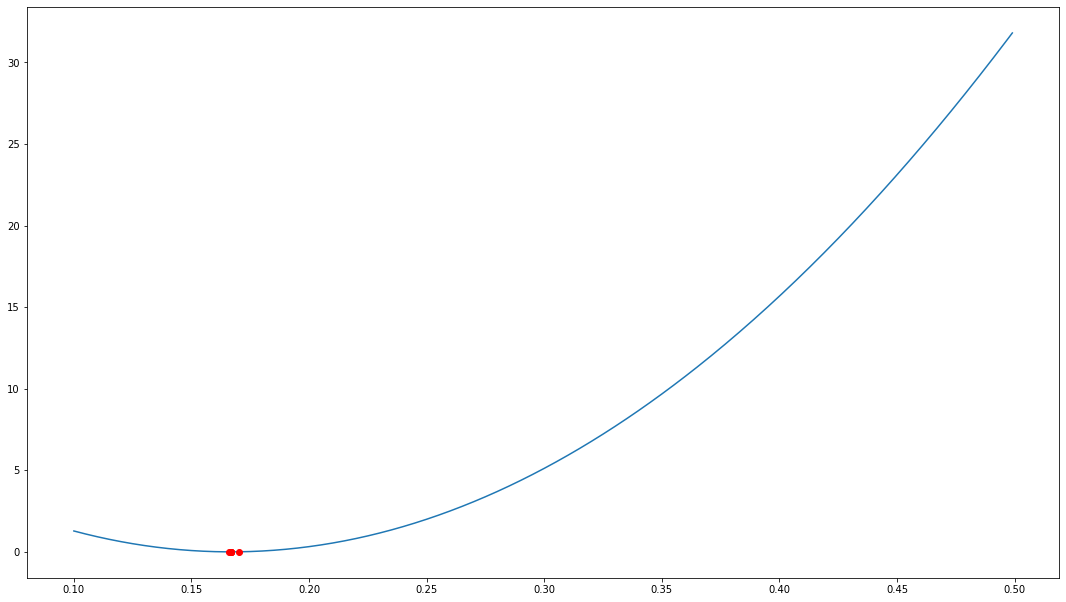

In [116]:
xk=[1,1,1]
dk=[-4,-8,-4]
line_search_equal_interval(fun,xk,dk)